# Curso 3 - Estatística com Python parte 1: Frequência e Medidas

## Aula 1 - Tipos de dados

In [1]:
import pandas as pd

In [2]:
dados=pd.read_csv('C:/Users/lucas/Downloads/Alura/Formação Data Science/1 - Introdução/3-Estatística com Python Parte 1/Downloads/Curso_de_Estatistica/Curso de Estatística/dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


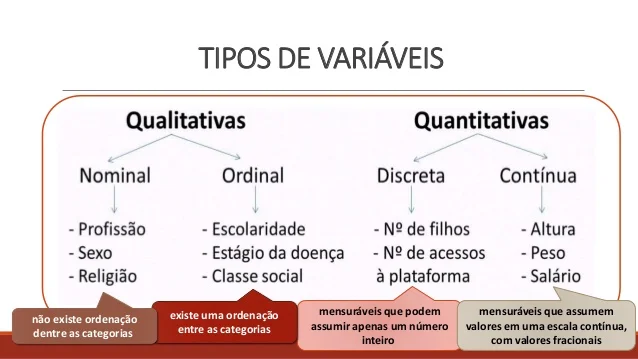

QUALITATIVA NOMINAL - Profissões: Engenheiro, Pedreiro...não tem uma ordenação

QUALITATIVA ORDINAL - Escolaridade: Ensino fundamental, Ensino Médio, Graduação, Mestrado, Doutorado,... tem ordenação

QUANTITATIVA DISCRETA - Nº filhos: 1,2,3,4,...É mensurável em número inteiro, e podem ter ordenação

QUANTITATIVA CONTÍNUA - Salário: 1.5k, 2.1k, 5.2k, 7.8k, 10.2k....podem ser números não inteiros e tem ordenação

Variáveis Qualitativas podem ser expressadas em números, porém não tem significado de quantidade. Anos de estudo pode variar de 0 à infinito, porém não tem maior ou menor, melhor ou pior

### Variáveis qualitativas ordinais 

In [4]:
dados['Anos de Estudo'].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 17, 13],
      dtype=int64)

### Variáveis qualitativas nominais 

In [5]:
dados['Sexo'].unique()

array([0, 1], dtype=int64)

0 homem e 1 mulher

In [6]:
dados['UF'].unique()

array([11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31,
       32, 33, 35, 41, 42, 43, 50, 51, 52, 53], dtype=int64)

In [8]:
dados['Cor'].unique()

array([8, 2, 4, 6, 0], dtype=int64)

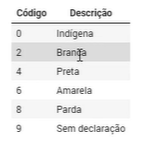


### Variáveis quantitativas discretas 

In [10]:
dados['Idade'].min()

13

In [11]:
dados['Idade'].max()

99

### Variáveis quantitativas contínuas 

In [3]:
dados['Altura'].sort_values().unique()

array([1.33924461, 1.36949351, 1.38239037, ..., 2.0041846 , 2.01582958,
       2.02849676])

### Aula 2 - Distribuição de frequências qualitativas

#### Método 1 

Contagem de todos os valores da coluna sexo

In [36]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

 Porcentagem dos dados analizados

In [37]:
dados['Sexo'].value_counts(normalize=True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [38]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize=True)*100

Arrumando os dados

In [39]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [40]:
dist_freq_qualitativas.rename(index = {0:'Masculino', 1: 'Feminino'}, inplace= True) #Colocar o inplace pra salvar
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns' , inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


#### Exemplo 

1 para Estatístico

2 para Cientista de Dados

3 para Programador Python

In [5]:
exemplo = pd.DataFrame({'Profissão': [1, 2, 3, 1, 2, 2, 2, 3, 3, 2, 1, 3]})
exemplo.head(10)

,Profissão
0,1
1,2
2,3
3,1
4,2
5,2
6,2
7,3
8,3
9,2


In [6]:
freq = exemplo['Profissão'].value_counts()
freq.head()

2    5
3    4
1    3
Name: Profissão, dtype: int64

In [7]:
perc = exemplo['Profissão'].round(2).value_counts(normalize=True)*100
perc.head()

2    41.666667
3    33.333333
1    25.000000
Name: Profissão, dtype: float64

In [44]:
tabela = pd.DataFrame({'Frequência': freq, 'Porcentagem (%)': perc})
tabela

,Frequência,Porcentagem (%)
2,5,41.666667
3,4,33.333333
1,3,25.000000


In [45]:
tabela.rename(index = {1:'Estatístico', 2: 'Cientista de dados', 3:'Programador Python'}, inplace= True) 
tabela.rename_axis('Profissão', axis = 'columns' , inplace = True)
tabela

Profissão,Frequência,Porcentagem (%)
Cientista de dados,5,41.666667
Programador Python,4,33.333333
Estatístico,3,25.000000


#### Método 2 

Para unir as 2 informações em uma unica tabela com o crosstab

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [8]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [9]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [50]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace= True)
frequencia.rename(columns = cor, inplace= True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [51]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


Cruzando o sexo, cor e a renda média

In [53]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### Distribuição de frequências quantitativas 

Como a pesquisa PNAD na qual baseamos nossos dados foi realizada em 2015, o valor do salário mínimo era de R$788,00.

Com base nisso, faremos o cálculo dos valores em reais de cada classificação apresentada.

A: acima de R$15.760,00;

B: de R$ 7.880,00 até R$15.760,00;

C: de R$ 3.152,00 até R$ 7.880,00;

D: de R$ 1.576,00 até R$3.152,00;

E: de zero até R$ 1.576,00.

In [10]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [11]:
dados['Renda'].min()

0

In [12]:
dados['Renda'].max()

200000

Criando as classes

In [13]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
classes

[0, 1576, 3152, 7880, 15760, 200000]

Criando o nome das classes

In [14]:
labels=['E','D','C','B','A']

A função cut agrupa os dados de acordo com as classes e o indice criado para os dados que serão analisados

In [15]:
pd.cut(dados.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

Frequencia dos dados

In [16]:
frequencia= pd.value_counts(pd.cut(dados.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True))

frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

percentual

In [17]:
percentual= pd.value_counts(pd.cut(dados.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True),
               normalize=True)*100

percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [18]:
dist_freq_quantitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
#criou a variável dist_freq_quantitativas para armazenar os dados das duas variáveis de frequencia e porcentagem num df
dist_freq_quantitativas

,Frequência,Porcentagem (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [19]:
dist_freq_quantitativas.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


### Frequência e porcentagem das Alturas 

In [85]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


### Amplitude Fixa 

A Regra de Sturges que otimiza a escolha da quantidade de classes que teremos nas tabelas de distribuições, considerando somente o número de observações que temos na variável.

# k = 1 + (10/3 log₁₀ n)

In [20]:
import numpy as np

In [21]:
n=dados.shape[0]
n

76840

In [22]:
k=1+(10/3 * np.log10(n))
k

17.285291187298853

Ou seja, o melhor jeito de visualizar os dados é dividir em 17 classes

In [23]:
k=int(k.round(0))
k

17

#### Criando a tabela de frequência e percentual

In [24]:
freq_renda=pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ), sort=False
)

freq_renda

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

Ou seja, ele criou as rendas em 17 classes 

In [25]:
perc_renda=pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ), normalize=True
)*100

perc_renda

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(94117.647, 105882.353]      0.007808
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(188235.294, 200000.0]       0.003904
(82352.941, 94117.647]       0.001301
(117647.059, 129411.765]     0.001301
(105882.353, 117647.059]     0.000000
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
Name: Renda, dtype: float64

In [26]:
dist_renda = pd.DataFrame(
    {'Frequência': freq_renda, 'Porcentagem (%)':perc_renda}
)
dist_renda

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


### Importando os dados no Histograma 

In [27]:
import seaborn as sns

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Density'>

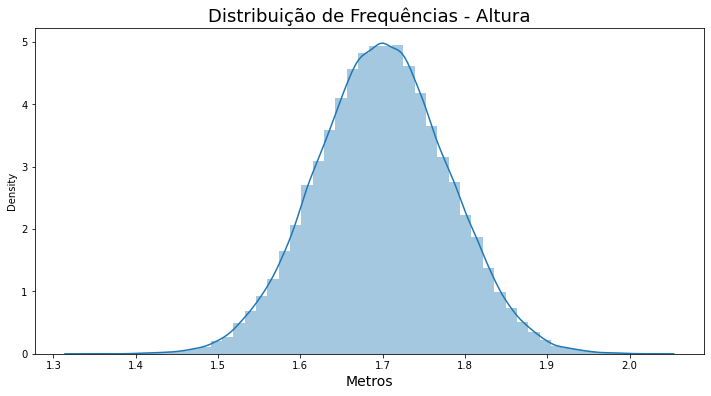

In [28]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot:>

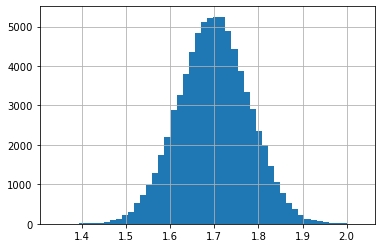

In [29]:
dados.Altura.hist(bins=50)

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

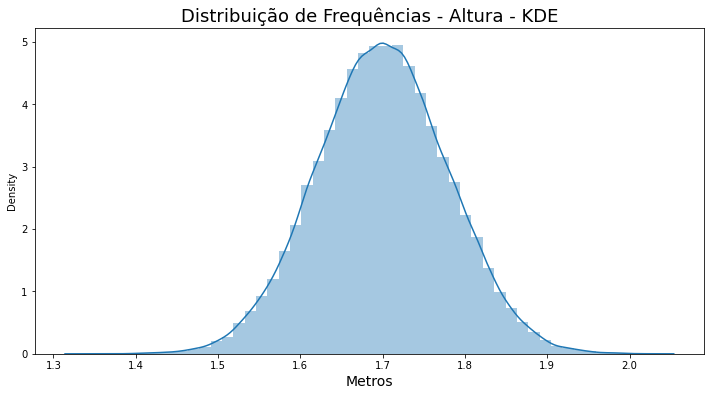

In [109]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot:>

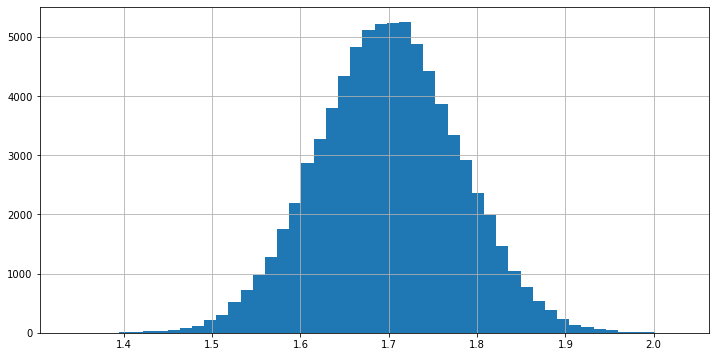

In [30]:
dados.Altura.hist(bins = 50, figsize=(12,6))

<AxesSubplot:>

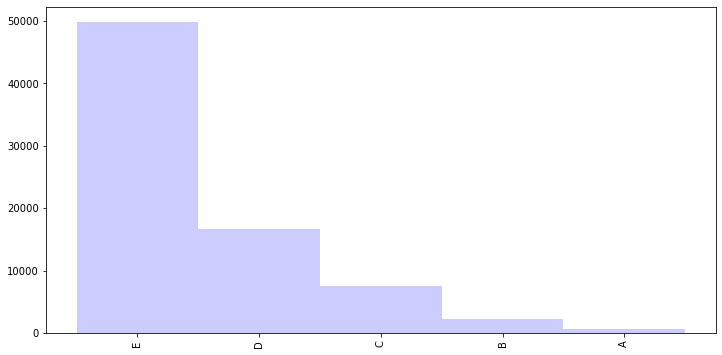

In [113]:
dist_freq_quantitativas['Frequência'].plot.bar(width= 1, color= 'blue', alpha = 0.2, figsize= (12, 6))

## Aula 3 - Medidas de Tendência Central

### Média Aritmética

In [5]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [32]:
(8 + 10 + 4 + 8 + 6 + 10 + 8)/7

7.714285714285714

In [34]:
df['Fulano'].mean()

7.714285714285714

In [35]:
df['Beltrano'].mean()

5.142857142857143

In [37]:
df['Sicrano'].mean()

7.714285714285714

In [42]:
dados.Renda.mean()

2000.3831988547631

In [43]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


#### Renda média por SEXO

In [45]:
dados.groupby(['Sexo']).mean()

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


Nesse caso mostrou todas as colunas, porém só desejamos ver a coluna de renda

In [46]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

#### Exercício 

In [47]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [48]:
dataset['Idade'].mean()

46.1

In [54]:
dataset.groupby(['Sexo']).mean()

,Idade
Sexo,
H,45.750000
M,46.333333


### Mediana 

Esta medida consiste no valor que divide a nossa série exatamente ao meio.

Primeiro passo é sempre ordenar os dados, verificar se é par ou ímpar, e depois realizar o cálculo da mediana

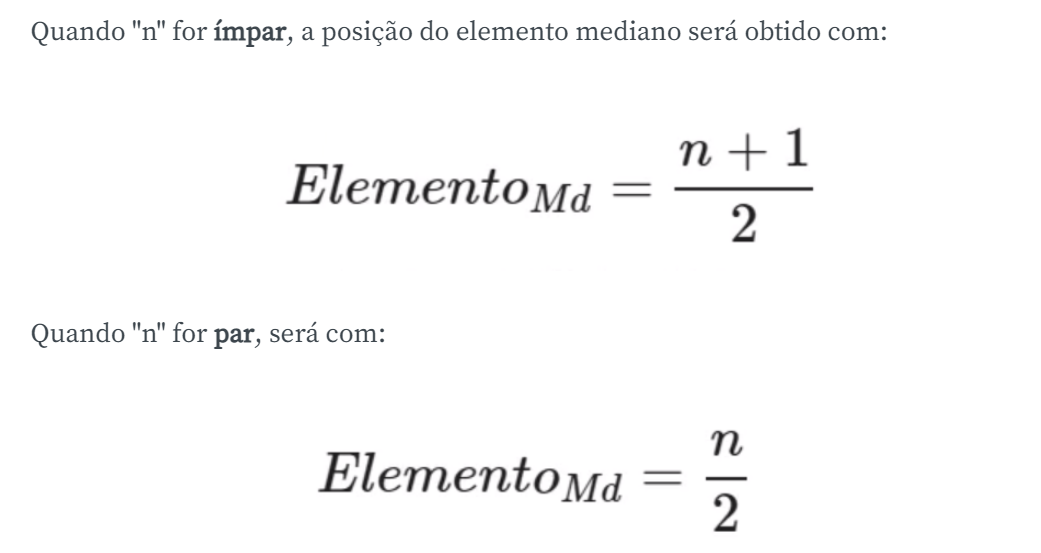

In [56]:
notas_fulano=df.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [57]:
notas_fulano.sort_values()

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [66]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Matemática,8
1,Português,10
2,Inglês,4
3,Geografia,8
4,História,6
5,Física,10
6,Química,8


In [67]:
n=notas_fulano.shape[0]
n

7

É ímpar

In [68]:
elemento_md=(n+1)/2
elemento_md

4.0

A mediana está na posição 4

In [69]:
notas_fulano.loc[elemento_md - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

A mediana é 8

In [70]:
notas_fulano.median()

C:\Users\lucas\AppData\Local\Temp/ipykernel_12768/2460163259.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  notas_fulano.median()


Fulano    8.0
dtype: float64

In [71]:
notas_beltrano = df.Beltrano.sample(6, random_state = 101)
notas_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Química       10.0
Português      2.0
Name: Beltrano, dtype: float64

In [72]:
notas_beltrano.median()

6.25

Outra forma de obter a mediana do df

In [73]:
dados.Renda.quantile()

1200.0

### Moda 

Dado que aparece com maior frequência no df

In [75]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [76]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [77]:
dados.Renda.mode()

0    788
dtype: int64

### Relação entre as medidas 

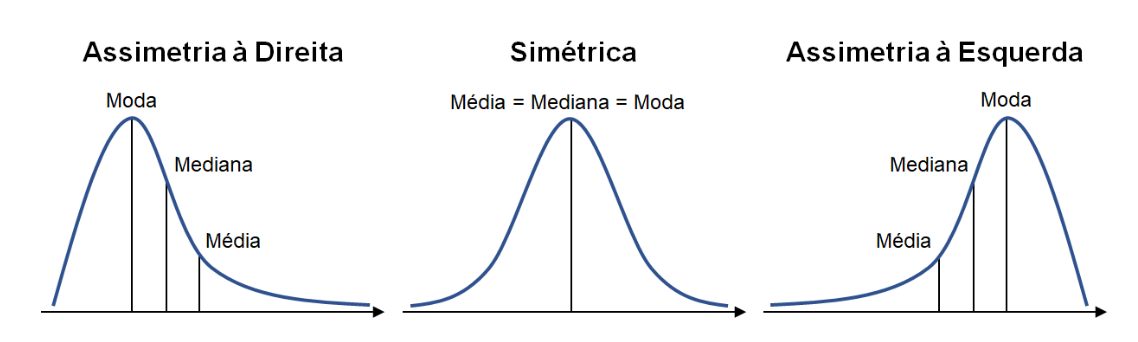


A Assimetria à Direita acontece quando há uma grande quantidade de valores que se afunilam de alguma forma, como no caso da pesquisa PNAD sobre a renda mensal, onde a maioria das pessoas é mais pobre justificando o pico em "moda", enquanto a minoria possui grandes rendimentos que diminuem o valor da média.

#### RENDA 

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda', ylabel='Density'>

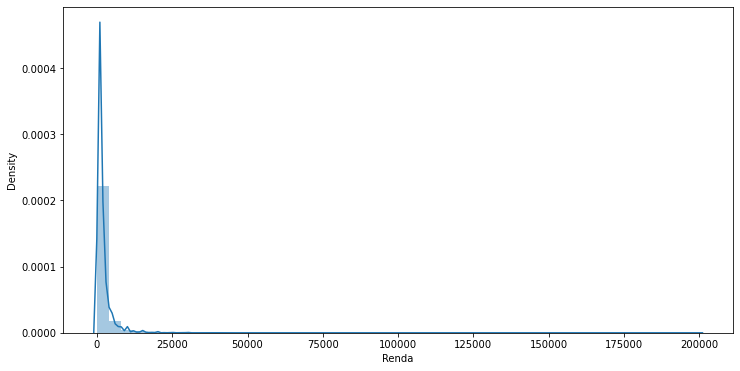

In [78]:
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(12, 6)
ax

Maioria das pessoas tem renda de um salário mínimo, porém há rendas de até 200k, e isso atrapalha a visualização do gráfico

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda', ylabel='Density'>

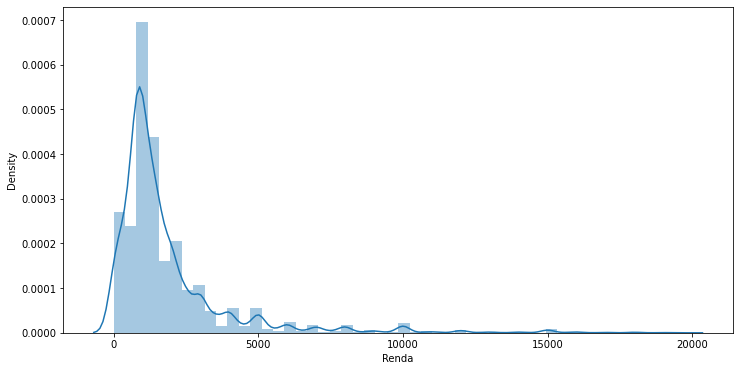

In [79]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

Esse tipo de dado se distribui igual o da primeira figura com assimetria à direita

#### Moda 

In [80]:
Moda = dados.Renda.mode()[0]
Moda

788

### Média

In [82]:
Media = dados.Renda.mean()
Media

2000.3831988547631

### Mediana 

In [81]:
Mediana = dados.Renda.median()
Mediana

1200.0

Conferindo:

In [84]:
Moda<Mediana<Media

True

#### ALTURA 

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Altura', ylabel='Density'>

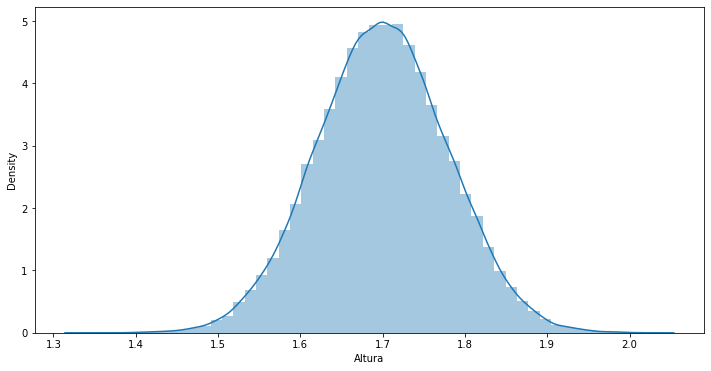

In [85]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [86]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [87]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [88]:
Media = dados.Altura.mean()
Media

1.6995124540575812

O primeiro resultado representará sua característica multimodal, como já vimos anteriormente. Essa é uma característica bastante forte de variáveis contínuas.

O segundo será 1.6993247325 e o terceiro 1.6995124540575814. Com isso, veremos que estas duas últimas medidas são bem próximas.

#### ANOS DE ESTUDO 

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Anos de Estudo', ylabel='Density'>

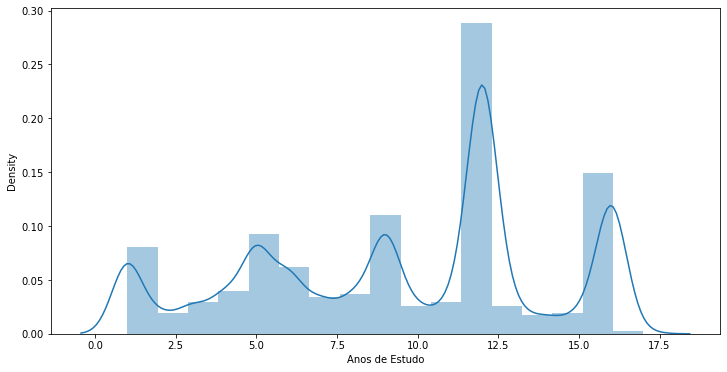

In [89]:
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12, 6)
ax

In [90]:
Moda = dados['Anos de Estudo'].mode()
Moda

0    12
dtype: int64

In [91]:
Mediana = dados['Anos de Estudo'].median()
Mediana

11.0

In [92]:
Media = dados['Anos de Estudo'].mean()
Media

9.469664237376367

## Aula 4 - Medidas Separatizes 

Quartis: divide a variável em quatro partes iguais quanto ao número de elementos de cada uma;

Decis: divide em dez partes iguais;

Percentis: divide em cem partes iguais.

Estas medidas são interessantes porque não são influenciadas por valores extremos de uma distribuição, diferente da média em relação à Renda, como já citamos. Neste nosso caso, a medida separatriz mediana representa melhor a tendência central da distribuição desses dados.

MEDIANA

In [94]:
dados.Renda.quantile()

1200.0

#### QUARTIS

In [96]:
dados.Renda.quantile([0.25,0.50,0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [98]:
[i/10 for i in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

#### DECIS 

In [99]:
dados.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

#### CENTIS 

In [101]:
dados.Renda.quantile([i / 100 for i in range(1, 99)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.94     5400.0
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
Name: Renda, Length: 98, dtype: float64

#### HISTOGRAMA ACUMULADO IDADE

In [103]:
dados.Idade.quantile([i/10 for i in range(1,10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

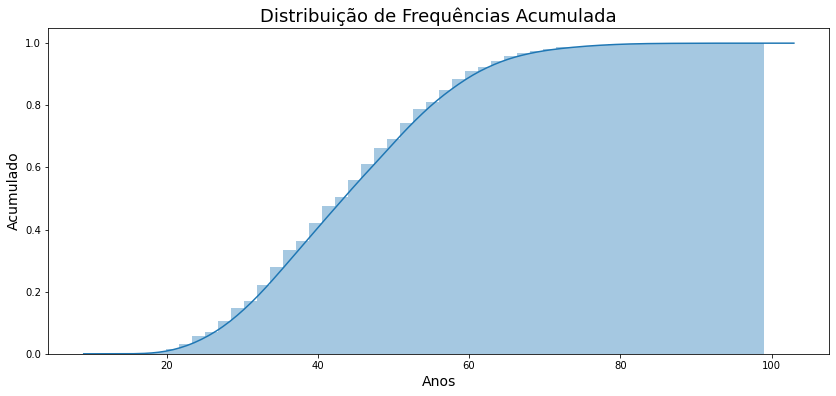

In [106]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

### BOXPLOT 

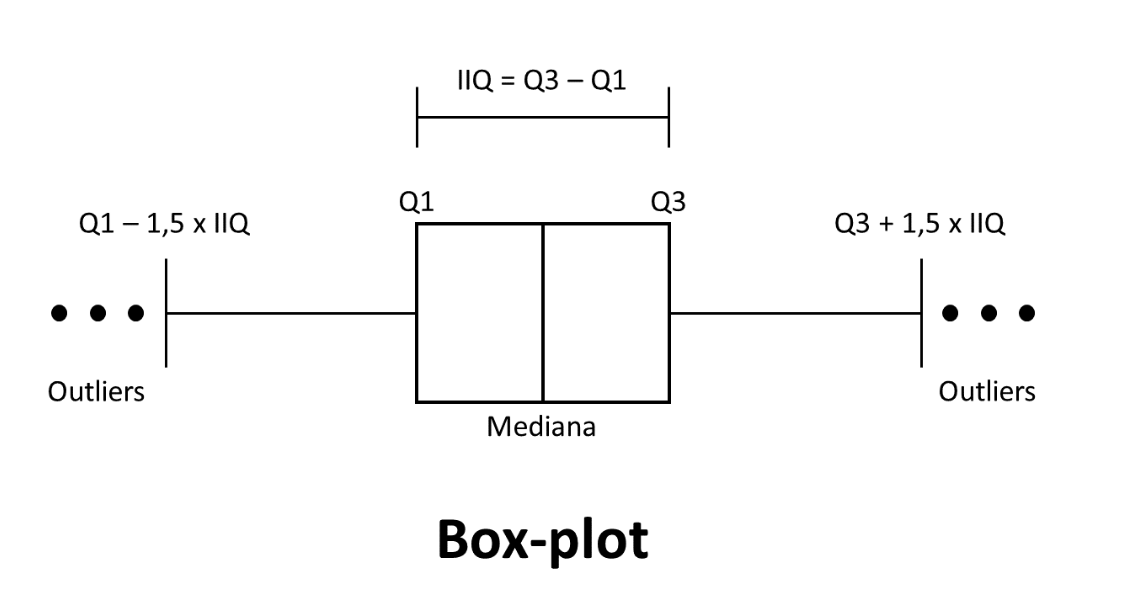

O "Q1" representa o primeiro quartil de 25%, teremos a mediana ao meio e o terceiro quartil representado por "Q3". A diferença entre os dois é o índice interquartil "IIQ".

Os extremos da representação gráfica são construídos como "Q1 - 1,5(IIQ)" e "Q3 + 1,5(IIQ)" respectivamente.

O "IIQ" é uma informação de dispersão de dados. Abaixo do primeiro limite e após o segundo, teremos candidatos a dados discrepantes, o que não significa que são outliers de imediato; como pesquisadores, teremos que analisar as informações com calma e decidir se são de fato ou não.

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros'>

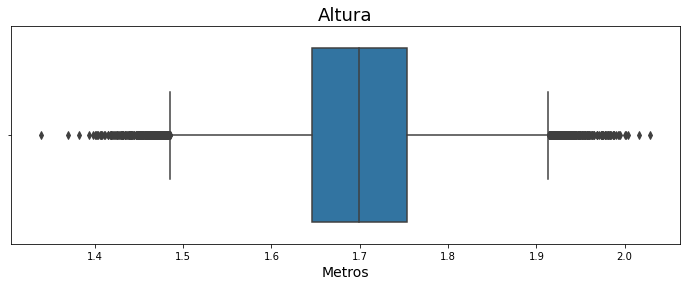

In [107]:
ax = sns.boxplot(x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

MEDIANA

In [109]:
dados.Altura.median()

1.6993247325

In [110]:
dados.Altura.quantile([0.25,0.50,0.75])

0.25    1.645785
0.50    1.699325
0.75    1.753062
Name: Altura, dtype: float64

ACHANDO O IIQ2

In [114]:
Q1=1.645785
Q3=1.753062
IIQ=Q3-Q1

print(Q1)
print(Q3)
print(IIQ)

1.645785
1.753062
0.10727699999999984


OUTLIERS

In [115]:
OUT1=Q1-1.5*IIQ
OUT2=Q3+1.5*IIQ

print(OUT1)
print(OUT2)

1.4848695000000003
1.9139774999999997


altura e sexo

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros', ylabel='Sexo'>

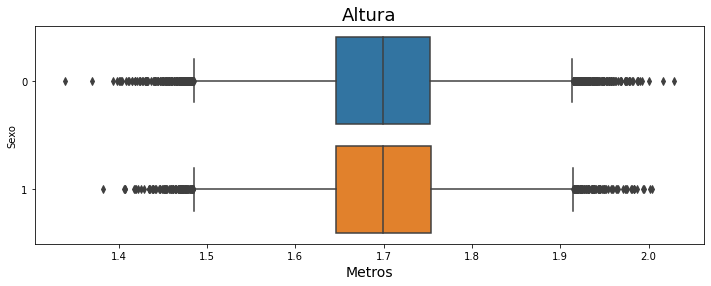

In [116]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

#### BOX PLOT RENDA 

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

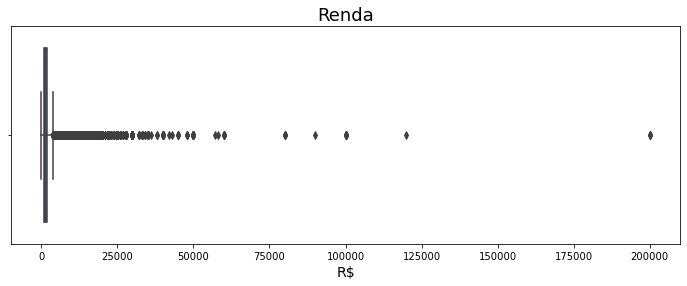

In [118]:
ax = sns.boxplot( x = 'Renda', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

Tem muitos outliers na Renda

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

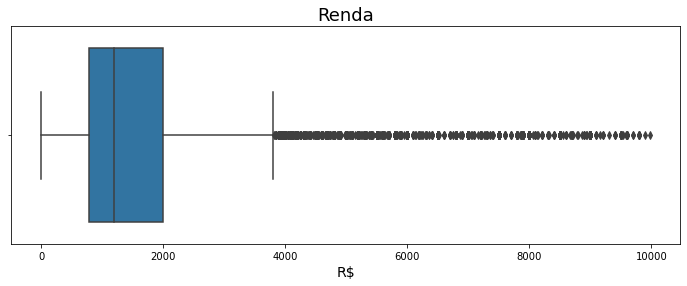

In [119]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

Agora utilizando rendas abaixo de 10k, porém ainda possuem muitos outliers

RENDA POR SEXO

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Sexo'>

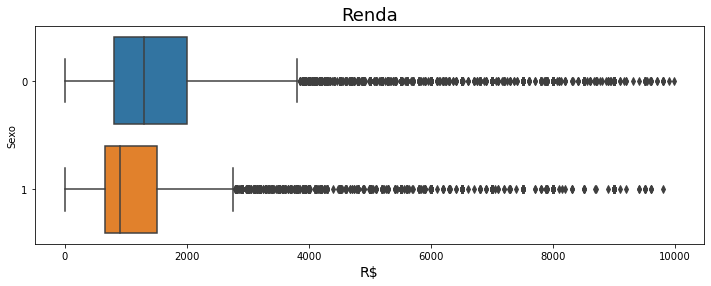

In [120]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

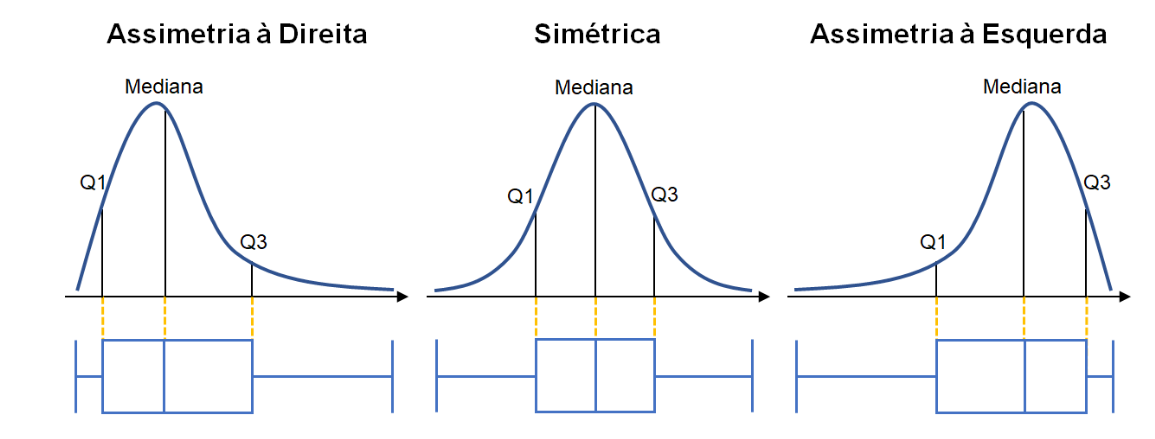

#### EXEMPLO DE APLICAÇÃO - RENDA POR UF

<AxesSubplot:title={'center':'Renda (R$) - Bahia X São Paulo'}, xlabel='R$', ylabel='UF'>

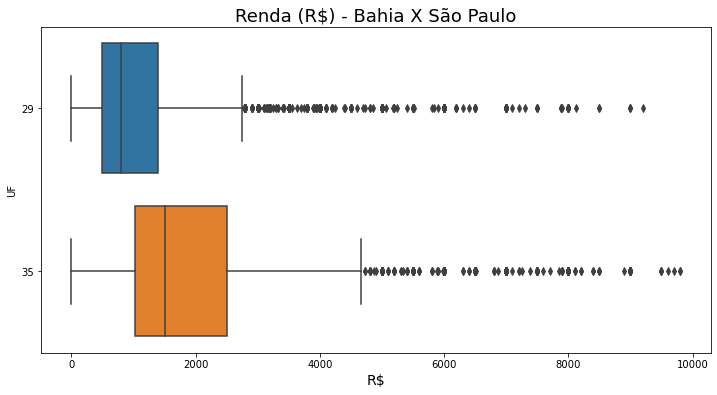

In [121]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('(UF==35 or UF==29) and Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 6)
ax.set_title('Renda (R$) - Bahia X São Paulo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

-O Boxplot só considerou rendas até 10k

-A mediana entre as 2 UF's são diferentes

-A maior renda é de SP

## AULA 5 - MEDIDAS DE DISPERSÃO 

### DESVIO MÉDIO PADRÃO 

In [6]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [8]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [9]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

Fulano e Sicrano possuem a mesma média, e Beltrano possui uma média inferior. Ao analisar as notas individuais, perceb-se que Fulano tem notas boas, exceto inglês e Bletrano tem notas muito menores em Português, Inglês, Geografia e História. Já sicrano tem notas muito bem distrinbuidas, variando entre 7.5 e 8.5

Dessa forma, devemos analisar a dispersão de suas notas

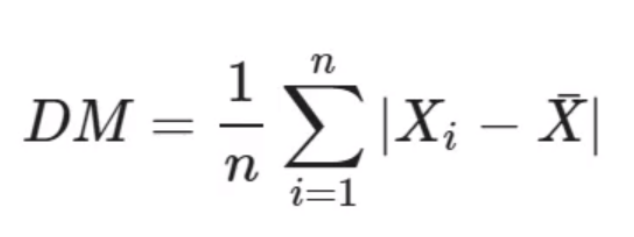

In [11]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


OBS: Se colocar dois colchetes ele monta um df

In [15]:
nota_media_fulano=notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

CRIANDO A COLUNA DE DESVIO

In [29]:
notas_fulano['Desvio'] = (notas_fulano['Fulano'] - nota_media_fulano).abs()
notas_fulano

C:\Users\lucas\AppData\Local\Temp/ipykernel_9992/1618606837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = (notas_fulano['Fulano'] - nota_media_fulano).abs()


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,3.714286
Geografia,8,0.285714
História,6,1.714286
Física,10,2.285714
Química,8,0.285714


VALOR DO DESVIO

In [30]:
notas_fulano['Desvio'].sum()

10.857142857142854

In [31]:
notas_fulano['Desvio'].mean()

1.5510204081632648

#### Função .mad() 

A função .mad() ja calcula direto o desvio médio padrão. O procedimento acima foi apenas uma aplicação

In [33]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

1.5510204081632648

### VARIÂNCIA 

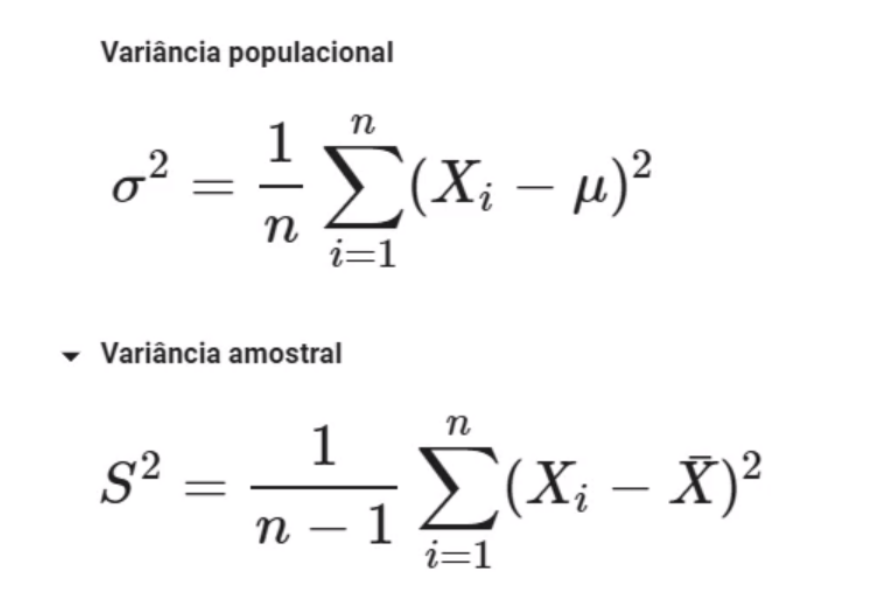

O quadrado dos valores do desvio e somados

In [34]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,(Desvio)^2
Matemática,8,0.285714,0.081633
Português,10,2.285714,5.224490
Inglês,4,3.714286,13.795918
Geografia,8,0.285714,0.081633
História,6,1.714286,2.938776
Física,10,2.285714,5.224490
Química,8,0.285714,0.081633


In [42]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano)-1)

4.57142857142857

Outra forma

In [35]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano) - 1)
notas_fulano

Matérias,Fulano,Desvio,(Desvio)^2
Matemática,8,0.285714,0.081633
Português,10,2.285714,5.224490
Inglês,4,3.714286,13.795918
Geografia,8,0.285714,0.081633
História,6,1.714286,2.938776
Física,10,2.285714,5.224490
Química,8,0.285714,0.081633


A função de variância

In [36]:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

### DESVIO PADRÃO 

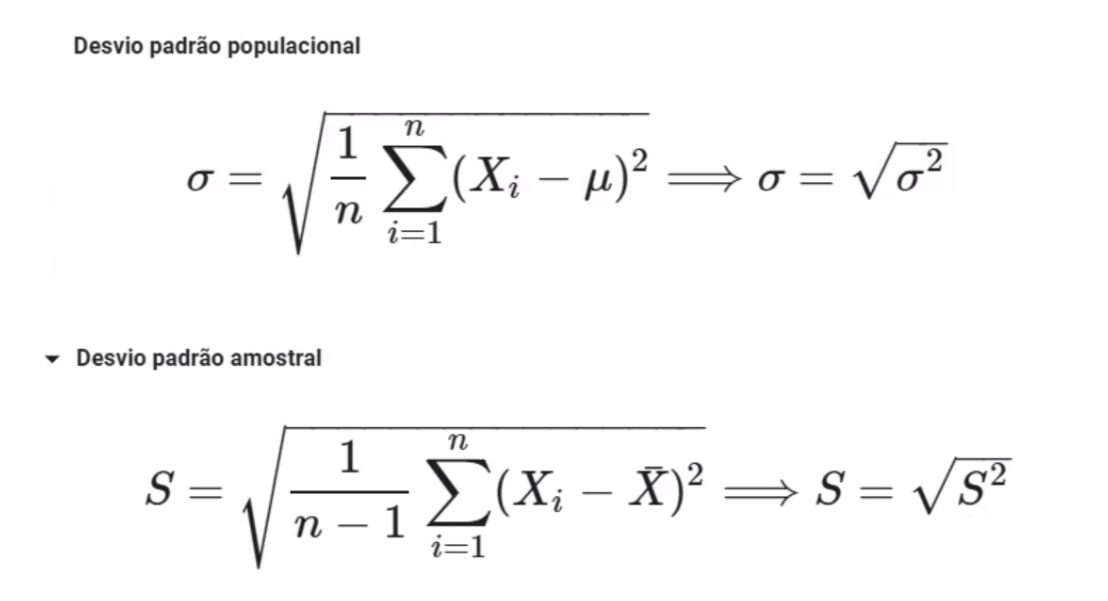

É a raíz da variância

In [43]:
import numpy as np

In [44]:
np.sqrt(variancia)

2.1380899352993947

In [46]:
dev_pad=notas_fulano['Fulano'].std()
dev_pad

2.1380899352993947